In [176]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression, HuberRegressor
import matplotlib.pyplot as pl
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [123]:
housing = pd.read_csv('train.csv', index_col=0)
housing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [ ]:
################## EXPLORING RELATIONSHIPS BTWN SALE PRICE AND VARs

In [124]:
housing.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [137]:
housing['MoSold'] = housing.MoSold.astype('category')

In [125]:
housing.corr(method = 'pearson')  #### corr btwn Continuous Vars

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [ ]:
################## ANOVA for cat Vars

In [178]:
housing['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [177]:
hous_zone = ols('SalePrice ~ C(MSZoning)', data=housing).fit()
print(hous_zone.summary())
aov_table = sm.stats.anova_lm(hous_zone, typ=2)
aov_table


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     43.84
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           8.82e-35
Time:                        12:03:18   Log-Likelihood:                -18461.
No. Observations:                1460   AIC:                         3.693e+04
Df Residuals:                    1455   BIC:                         3.696e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          7.453e+04   2.38e+0

,sum_sq,df,F,PR(>F)
C(MSZoning),9.904000e+11,4.0,43.840282,8.817634e-35
Residual,8.217511e+12,1455.0,NaN,NaN


In [213]:
housing['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [184]:
hous_alley = ols('SalePrice ~ C(Alley)', data=housing).fit()
print(hous_alley.summary())
aov_table = sm.stats.anova_lm(hous_alley, typ=2)
aov_table

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     35.56
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           4.90e-08
Time:                        12:08:42   Log-Likelihood:                -1083.9
No. Observations:                  91   AIC:                             2172.
Df Residuals:                      89   BIC:                             2177.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.222e+05   5153.091  

,sum_sq,df,F,PR(>F)
C(Alley),4.721637e+10,1.0,35.56206,4.899826e-08
Residual,1.181669e+11,89.0,NaN,NaN


In [214]:
housing['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [187]:
hous_Lotsh = ols('SalePrice ~ C(LotShape)', data=housing).fit()
print(hous_Lotsh.summary())

aov_table = sm.stats.anova_lm(hous_Lotsh, typ=2)
aov_table

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     40.13
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           6.45e-25
Time:                        12:09:30   Log-Likelihood:                -18486.
No. Observations:                1460   AIC:                         3.698e+04
Df Residuals:                    1456   BIC:                         3.700e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.061e+05   3473

,sum_sq,df,F,PR(>F)
C(LotShape),7.032607e+11,3.0,40.132852,6.447524e-25
Residual,8.504651e+12,1456.0,NaN,NaN


In [215]:
housing['LandContour'].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [189]:
hous_Cont = ols('SalePrice ~ C(LandContour)', data=housing).fit()
print(hous_Cont.summary())

aov_table = sm.stats.anova_lm(hous_Cont, typ=2)
aov_table

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     12.85
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           2.74e-08
Time:                        12:10:23   Log-Likelihood:                -18525.
No. Observations:                1460   AIC:                         3.706e+04
Df Residuals:                    1456   BIC:                         3.708e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.431e+

,sum_sq,df,F,PR(>F)
C(LandContour),2.375097e+11,3.0,12.850188,2.742217e-08
Residual,8.970402e+12,1456.0,NaN,NaN


In [216]:
housing['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [191]:
hous_Config = ols('SalePrice ~ C(LotConfig)', data=housing).fit()
print(hous_Config.summary())

aov_table = sm.stats.anova_lm(hous_Config, typ=2)
aov_table

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     7.810
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           3.16e-06
Time:                        12:11:12   Log-Likelihood:                -18529.
No. Observations:                1460   AIC:                         3.707e+04
Df Residuals:                    1455   BIC:                         3.709e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

,sum_sq,df,F,PR(>F)
C(LotConfig),1.935444e+11,4.0,7.809954,0.000003
Residual,9.014367e+12,1455.0,NaN,NaN


In [217]:
housing['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [195]:
hous_Neigh = ols('SalePrice ~ C(Neighborhood)', data=housing).fit()
print(hous_Neigh.summary())

aov_table = sm.stats.anova_lm(hous_Neigh, typ=2)
aov_table


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     71.78
Date:                Thu, 08 Aug 2019   Prob (F-statistic):          1.56e-225
Time:                        12:12:38   Log-Likelihood:                -17968.
No. Observations:                1460   AIC:                         3.599e+04
Df Residuals:                    1435   BIC:                         3.612e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

,sum_sq,df,F,PR(>F)
C(Neighborhood),5.023606e+12,24.0,71.784865,1.558600e-225
Residual,4.184305e+12,1435.0,NaN,NaN


In [218]:
housing['Condition1'].unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

In [197]:
hous_Cond1 = ols('SalePrice ~ C(Condition1)', data=housing).fit()
print(hous_Cond1.summary())

aov_table = sm.stats.anova_lm(hous_Cond1, typ=2)
aov_table

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     6.118
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           8.90e-08
Time:                        12:13:57   Log-Likelihood:                -18520.
No. Observations:                1460   AIC:                         3.706e+04
Df Residuals:                    1451   BIC:                         3.711e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.35

,sum_sq,df,F,PR(>F)
C(Condition1),3.004600e+11,8.0,6.118017,8.904549e-08
Residual,8.907451e+12,1451.0,NaN,NaN


In [219]:
housing['BldgType'].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [220]:
hous_BType = ols('SalePrice ~ C(BldgType)', data=housing).fit()
print(hous_BType.summary())

aov_table = sm.stats.anova_lm(hous_BType, typ=2)
aov_table

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     13.01
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           2.06e-10
Time:                        12:34:09   Log-Likelihood:                -18518.
No. Observations:                1460   AIC:                         3.705e+04
Df Residuals:                    1455   BIC:                         3.707e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.858e+

,sum_sq,df,F,PR(>F)
C(BldgType),3.179863e+11,4.0,13.011077,2.056736e-10
Residual,8.889925e+12,1455.0,NaN,NaN


In [221]:
housing['HouseStyle'].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [201]:
hous_style = ols('SalePrice ~ C(HouseStyle)', data=housing).fit()
print(hous_style.summary())

aov_table = sm.stats.anova_lm(hous_style, typ=2)
aov_table

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     19.60
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           3.38e-25
Time:                        12:15:34   Log-Likelihood:                -18478.
No. Observations:                1460   AIC:                         3.697e+04
Df Residuals:                    1452   BIC:                         3.701e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

,sum_sq,df,F,PR(>F)
C(HouseStyle),7.947590e+11,7.0,19.595001,3.376777e-25
Residual,8.413152e+12,1452.0,NaN,NaN


In [222]:
housing['RoofMatl'].unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

In [202]:
hous_roof = ols('SalePrice ~ C(RoofMatl)', data=housing).fit()
print(hous_roof.summary())

aov_table = sm.stats.anova_lm(hous_roof, typ=2)
aov_table

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     6.727
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           7.23e-08
Time:                        12:16:17   Log-Likelihood:                -18521.
No. Observations:                1460   AIC:                         3.706e+04
Df Residuals:                    1452   BIC:                         3.710e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 1.

,sum_sq,df,F,PR(>F)
C(RoofMatl),2.892493e+11,7.0,6.727305,7.231445e-08
Residual,8.918662e+12,1452.0,NaN,NaN


In [223]:
housing['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [203]:

hous_ext = ols('SalePrice ~ C(Exterior1st)', data=housing).fit()
print(hous_ext.summary())

aov_table = sm.stats.anova_lm(hous_ext, typ=2)
aov_table

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     18.61
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           2.59e-43
Time:                        12:17:02   Log-Likelihood:                -18423.
No. Observations:                1460   AIC:                         3.688e+04
Df Residuals:                    1445   BIC:                         3.696e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

,sum_sq,df,F,PR(>F)
C(Exterior1st),1.406721e+12,14.0,18.611743,2.586089e-43
Residual,7.801190e+12,1445.0,NaN,NaN


In [224]:
housing['Exterior2nd'].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

In [204]:

hous_ext2 = ols('SalePrice ~ C(Exterior2nd)', data=housing).fit()
print(hous_ext2.summary())

aov_table = sm.stats.anova_lm(hous_ext2, typ=2)
aov_table

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     17.50
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           4.84e-43
Time:                        12:17:56   Log-Likelihood:                -18422.
No. Observations:                1460   AIC:                         3.688e+04
Df Residuals:                    1444   BIC:                         3.696e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

,sum_sq,df,F,PR(>F)
C(Exterior2nd),1.416452e+12,15.0,17.50084,4.842186e-43
Residual,7.791460e+12,1444.0,NaN,NaN


In [225]:
housing['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [205]:
hous_MasVnrT = ols('SalePrice ~ C(MasVnrType)', data=housing).fit()
print(hous_MasVnrT.summary())

aov_table = sm.stats.anova_lm(hous_MasVnrT, typ=2)
aov_table

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     111.7
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           4.79e-65
Time:                        12:19:38   Log-Likelihood:                -18288.
No. Observations:                1452   AIC:                         3.658e+04
Df Residuals:                    1448   BIC:                         3.661e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

,sum_sq,df,F,PR(>F)
C(MasVnrType),1.713827e+12,3.0,111.67238,4.793331e-65
Residual,7.407445e+12,1448.0,NaN,NaN


In [226]:
housing['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [206]:
hous_ExterQual = ols('SalePrice ~ C(ExterQual)', data=housing).fit()
print(hous_ExterQual.summary())

aov_table = sm.stats.anova_lm(hous_ExterQual, typ=2)
aov_table

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     443.3
Date:                Thu, 08 Aug 2019   Prob (F-statistic):          1.44e-204
Time:                        12:20:23   Log-Likelihood:                -18070.
No. Observations:                1460   AIC:                         3.615e+04
Df Residuals:                    1456   BIC:                         3.617e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3.674e+05   7972

,sum_sq,df,F,PR(>F)
C(ExterQual),4.395744e+12,3.0,443.334831,1.439551e-204
Residual,4.812167e+12,1456.0,NaN,NaN


In [227]:
housing['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [207]:

hous_Bsmt = ols('SalePrice ~ C(BsmtQual)', data=housing).fit()
print(hous_Bsmt.summary())

aov_table = sm.stats.anova_lm(hous_Bsmt, typ=2)
aov_table

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     392.9
Date:                Thu, 08 Aug 2019   Prob (F-statistic):          9.61e-186
Time:                        12:21:35   Log-Likelihood:                -17643.
No. Observations:                1423   AIC:                         3.529e+04
Df Residuals:                    1419   BIC:                         3.531e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           3.27e+05   5339.63

,sum_sq,df,F,PR(>F)
C(BsmtQual),4.066554e+12,3.0,392.913506,9.610615e-186
Residual,4.895429e+12,1419.0,NaN,NaN


In [228]:
housing['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [208]:
hous_Kit = ols('SalePrice ~ C(KitchenQual)', data=housing).fit()
print(hous_Kit.summary())

aov_table = sm.stats.anova_lm(hous_Kit, typ=2)
aov_table

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     407.8
Date:                Thu, 08 Aug 2019   Prob (F-statistic):          3.03e-192
Time:                        12:23:17   Log-Likelihood:                -18099.
No. Observations:                1460   AIC:                         3.621e+04
Df Residuals:                    1456   BIC:                         3.623e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3.286e+05 

,sum_sq,df,F,PR(>F)
C(KitchenQual),4.204320e+12,3.0,407.806352,3.032213e-192
Residual,5.003592e+12,1456.0,NaN,NaN


In [229]:
housing['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [210]:
hous_Fire = ols('SalePrice ~ C(FireplaceQu)', data=housing).fit()
print(hous_Fire.summary())

aov_table = sm.stats.anova_lm(hous_Fire, typ=2)
aov_table


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     24.40
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           5.02e-19
Time:                        12:23:57   Log-Likelihood:                -9802.2
No. Observations:                 770   AIC:                         1.961e+04
Df Residuals:                     765   BIC:                         1.964e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3.377e+05 

,sum_sq,df,F,PR(>F)
C(FireplaceQu),6.561883e+11,4.0,24.398929,5.016300e-19
Residual,5.143505e+12,765.0,NaN,NaN


In [230]:
housing['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [211]:
hous_SaleC = ols('SalePrice ~ C(SaleCondition )', data=housing).fit()
print(hous_SaleC.summary())

aov_table = sm.stats.anova_lm(hous_SaleC, typ=2)
aov_table

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     45.58
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           7.99e-44
Time:                        12:24:37   Log-Likelihood:                -18438.
No. Observations:                1460   AIC:                         3.689e+04
Df Residuals:                    1454   BIC:                         3.692e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

,sum_sq,df,F,PR(>F)
C(SaleCondition),1.247649e+12,5.0,45.578428,7.988268e-44
Residual,7.960263e+12,1454.0,NaN,NaN


In [231]:
housing['SaleType'].unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [212]:
hous_SaleT = ols('SalePrice ~ C(SaleType )', data=housing).fit()
print(hous_SaleT.summary())

aov_table = sm.stats.anova_lm(hous_SaleT, typ=2)
aov_table

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     28.86
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           5.04e-42
Time:                        12:25:28   Log-Likelihood:                -18436.
No. Observations:                1460   AIC:                         3.689e+04
Df Residuals:                    1451   BIC:                         3.694e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              1.44e+05 

,sum_sq,df,F,PR(>F)
C(SaleType),1.264131e+12,8.0,28.863054,5.039767e-42
Residual,7.943780e+12,1451.0,NaN,NaN


In [ ]:
#############################################################################################################

In [232]:
housing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


In [233]:
housing.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [ ]:
##################################### LINEAR REGRESSIONS

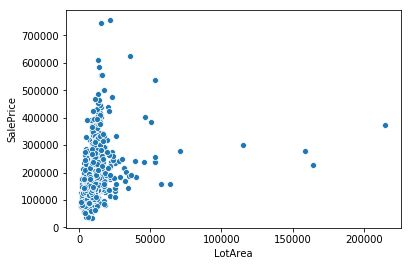

In [238]:
X = housing['LotArea']
y = housing['SalePrice']

sns.scatterplot(X, y)
